### Data <a class="anchor" id="Data"></a>

The data for this project was downloaded from Kaggle:

https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data

Information regarding the features for the data are located in the `Column` section on the website.

#### Loading the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Amazon Sale Report.csv")

In [3]:
data.shape

(128975, 24)

In [4]:
# Checking columns
data.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [6]:
# descriptive statistics summary
data.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [7]:
# Checking Unique values
data.apply(pd.unique).to_frame(name='Unique Values')

,Unique Values
index,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
Order ID,"[405-8078784-5731545, 171-9198151-1101146, 404..."
Date,"[04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26..."
Status,"[Cancelled, Shipped - Delivered to Buyer, Ship..."
Fulfilment,"[Merchant, Amazon]"
Sales Channel,"[Amazon.in, Non-Amazon]"
ship-service-level,"[Standard, Expedited]"
Style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET..."
SKU,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X..."
Category,"[Set, kurta, Western Dress, Top, Ethnic Dress,..."


#### Missing Values

In [8]:
# see what columns have missing data
data.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [9]:
# Percent of Missing Values
max_rows = data["Order ID"].count()
print('% Missing Data:')
print((1 - data.count() / max_rows) * 100)

% Missing Data:
index                  0.000000
Order ID               0.000000
Date                   0.000000
Status                 0.000000
Fulfilment             0.000000
Sales Channel          0.000000
ship-service-level     0.000000
Style                  0.000000
SKU                    0.000000
Category               0.000000
Size                   0.000000
ASIN                   0.000000
Courier Status         5.328164
Qty                    0.000000
currency               6.043807
Amount                 6.043807
ship-city              0.025586
ship-state             0.025586
ship-postal-code       0.025586
ship-country           0.025586
promotion-ids         38.110487
B2B                    0.000000
fulfilled-by          69.546811
Unnamed: 22           38.030626
dtype: float64


In [10]:
# dropping columns
 
data.drop(columns=['index','Unnamed: 22', 'Courier Status', 'currency', 'Sales Channel ', 
                    'ship-postal-code', 'ship-country', 'promotion-ids', 'fulfilled-by'], inplace = True)


In [11]:
data["Amount"].fillna(0, inplace=True)
data.isnull().sum()

Order ID               0
Date                   0
Status                 0
Fulfilment             0
ship-service-level     0
Style                  0
SKU                    0
Category               0
Size                   0
ASIN                   0
Qty                    0
Amount                 0
ship-city             33
ship-state            33
B2B                    0
dtype: int64

In [12]:
# checking duplicates
data.duplicated().sum()

6

In [13]:
# dropping
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [14]:
# replacing boolean values 
data.B2B.replace([False, True], value=["Customer", "Business"], inplace=True)
data.B2B.value_counts()

B2B
Customer    128098
Business       871
Name: count, dtype: int64

####  Adding Month column for better Analysis

In [15]:
# standardizng date format
data["Date"] = pd.to_datetime(data["Date"])

# creating month column
data["Month"] = data["Date"].dt.month
data["Month"].unique()

array([4, 3, 5, 6])

In [16]:
data["Month"].replace([3, 4, 5, 6], value=["March", "April", "May", "June"], inplace=True)
data["Month"].unique()

array(['April', 'March', 'May', 'June'], dtype=object)

#### Sales Analysis

In [17]:
# Month sales distribution
monthly_sales = data.groupby('Month')["Amount"].sum()
monthly_sales_sorted = monthly_sales.reindex(['March', 'April', 'May', 'June'])
monthly_sales_sorted

Month
March      101683.85
April    28838708.32
May      26225004.75
June     23424646.38
Name: Amount, dtype: float64

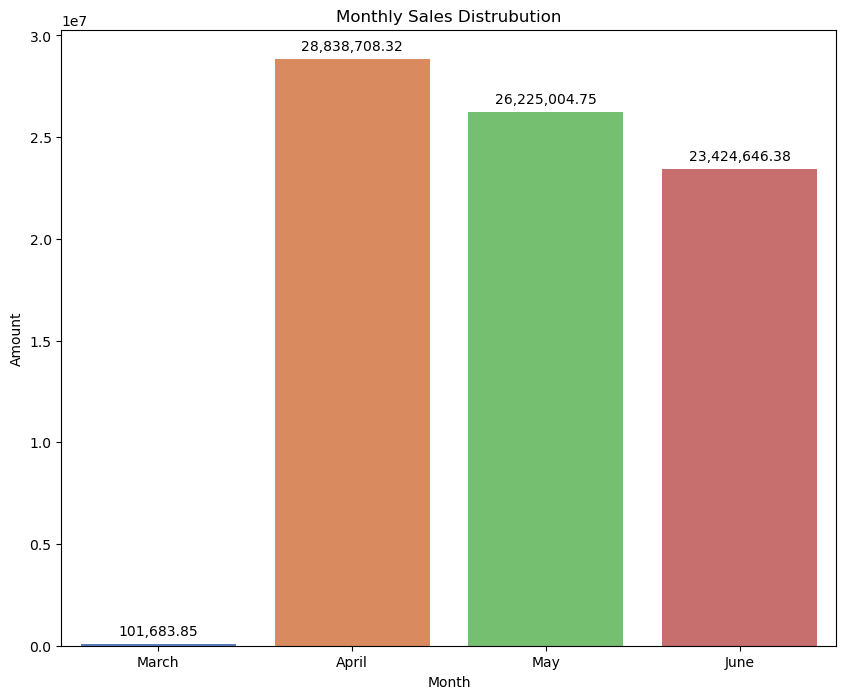

In [18]:
plt.figure(figsize=(10, 8))
bar_plot = sns.barplot(x=monthly_sales_sorted.index, y=monthly_sales_sorted, palette="muted")
for i in bar_plot.patches:
    bar_plot.annotate(f'{i.get_height():,.2f}', 
                      (i.get_x() + i.get_width() / 2., i.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points', 
                      fontsize=10)
plt.title("Monthly Sales Distrubution")
plt.show()

The sales are lowest in `March`, barely crossing ₹100,000, however the graph suggests a seasonal pattern in sales, with a sharp rise in `April` followed by a gradual decline.

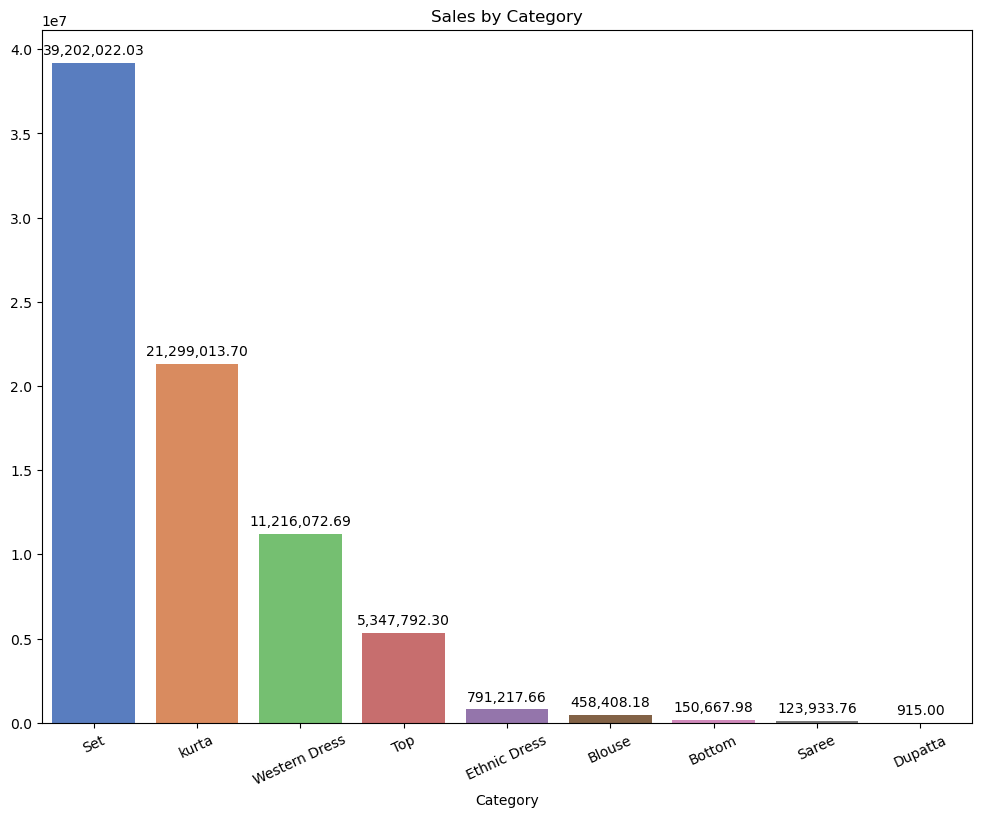

In [19]:
# Product sold

sales_by_category = data.groupby("Category")["Amount"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 9))
bar_plot = sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette="muted")

# Annotate each bar with its value
for i in bar_plot.patches:
    bar_plot.annotate(f'{i.get_height():,.2f}', 
                      (i.get_x() + i.get_width() / 2., i.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points', 
                      fontsize=10)
    
plt.title("Sales by Category")
plt.xticks(rotation=25)
plt.show()

* The `Set` category has the highest sales figure of about `40 million`, which is almost double the sales of the second-highest category, `Kurta`.

* The ‘`Kurta` and `Western Dress` categories have sales of over `21 million` and `11 million` respectively, which are significantly higher than the other categories.

* Other categories lag behind, the remaining categories have sales of less than `6 million`, with `Dupatta` having the `lowest sales of only 915`.

#### Order Status Anaysis

In [20]:
# Order Status Count
status_count = data.Status.value_counts().reset_index()
status_count

,Status,count
0,Shipped,77801
1,Shipped - Delivered to Buyer,28769
2,Cancelled,18329
3,Shipped - Returned to Seller,1953
4,Shipped - Picked Up,973
5,Pending,658
6,Pending - Waiting for Pick Up,281
7,Shipped - Returning to Seller,145
8,Shipped - Out for Delivery,35
9,Shipped - Rejected by Buyer,11


In [21]:
# categories to keep separately
categories_to_keep = ['Shipped', 'Shipped - Delivered to Buyer', 'Cancelled']

# Combine all other categories into 'Others'
status_count['Status'] = status_count['Status'].apply(lambda x: x if x in categories_to_keep else 'Others')
                                                       
# Sum counts again after combining 'Others'
finalstatus_count = status_count.groupby('Status')['count'].sum().reset_index()
finalstatus_count

,Status,count
0,Cancelled,18329
1,Others,4070
2,Shipped,77801
3,Shipped - Delivered to Buyer,28769


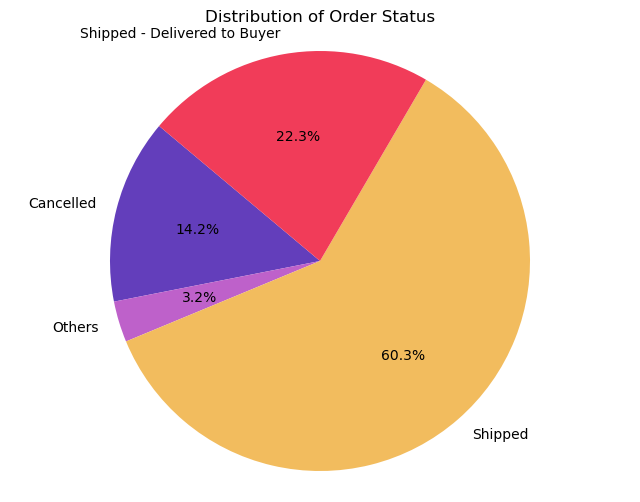

In [22]:
# pie chart
plt.figure(figsize=(8, 6))
plt.pie(finalstatus_count['count'], labels=finalstatus_count['Status'], 
        autopct='%1.1f%%', startangle=140, colors=["#633EBB", "#BE61CA", "#F2BC5E", "#F13C59"])
plt.title('Distribution of Order Status', )
plt.axis("equal")
plt.show()

From the chart we can assume that:
* The system boasts an efficient dispatch and delivery process.
* The cancellation rate is relatively low, indicating overall customer satisfaction.
* The system adeptly handles diverse issues within the "Others" category.

#### Cancellation Anaysis

In [23]:
# Cancellation analysis
Cancelled_order = data[data["Status"] == "Cancelled"]

total_cancelled_amount = Cancelled_order["Amount"].sum()
print(f'Total amount for cancelled orders: {total_cancelled_amount}')

Total amount for cancelled orders: 6919284.3


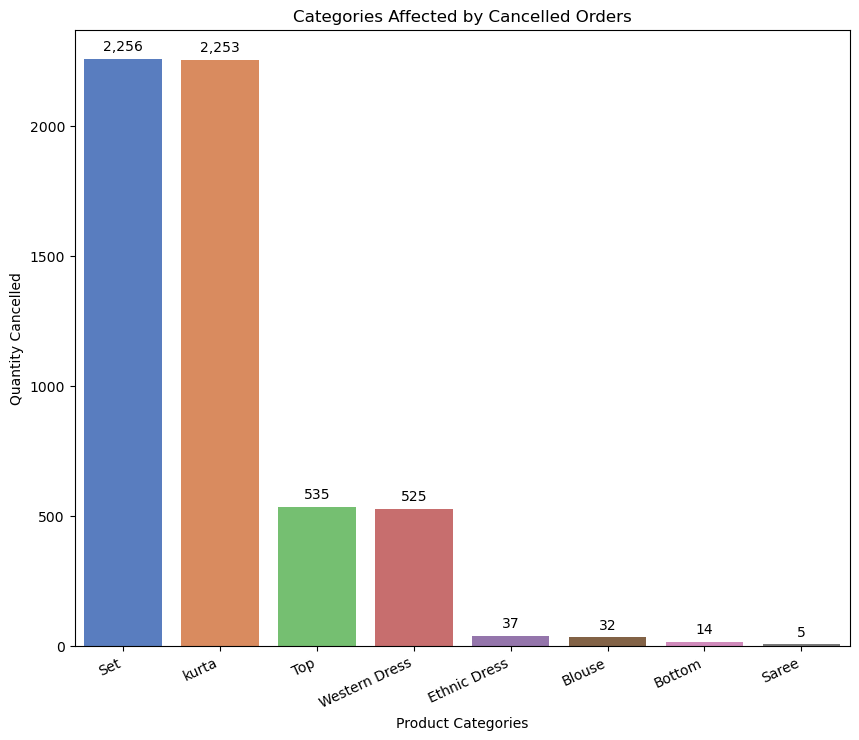

In [24]:

category_cancelled = Cancelled_order.groupby("Category")["Qty"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
bar_plot = sns.barplot(x=category_cancelled.index, y=category_cancelled.values, palette="muted")
plt.title('Categories Affected by Cancelled Orders')
plt.xlabel('Product Categories')
plt.ylabel('Quantity Cancelled')
plt.xticks(rotation=25, ha='right')

# Annotate each bar with its value
for i in bar_plot.patches:
    bar_plot.annotate(f'{i.get_height():,.0f}', 
                      (i.get_x() + i.get_width() / 2., i.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points', 
                      fontsize=10)
plt.show()

Bar graph showing the quantity of cancelled orders across different product categories, such as Set, Kurta, Top, etc.
* The `Set` and `Kurta` categories have the `highest numbers` of cancelled orders, with over `2,000` each. This may indicate a high demand or a high return rate for these products.

* The other categories have much lower numbers of cancelled orders, ranging from `37 to 5`. This may suggest a lower demand or a lower return rate for these products.

Overall there's a wide variation in the cancellation rate by category, which could be influenced by factors such as product quality, customer satisfaction, pricing, availability, and competition.

#### Fulfilment Anaysis

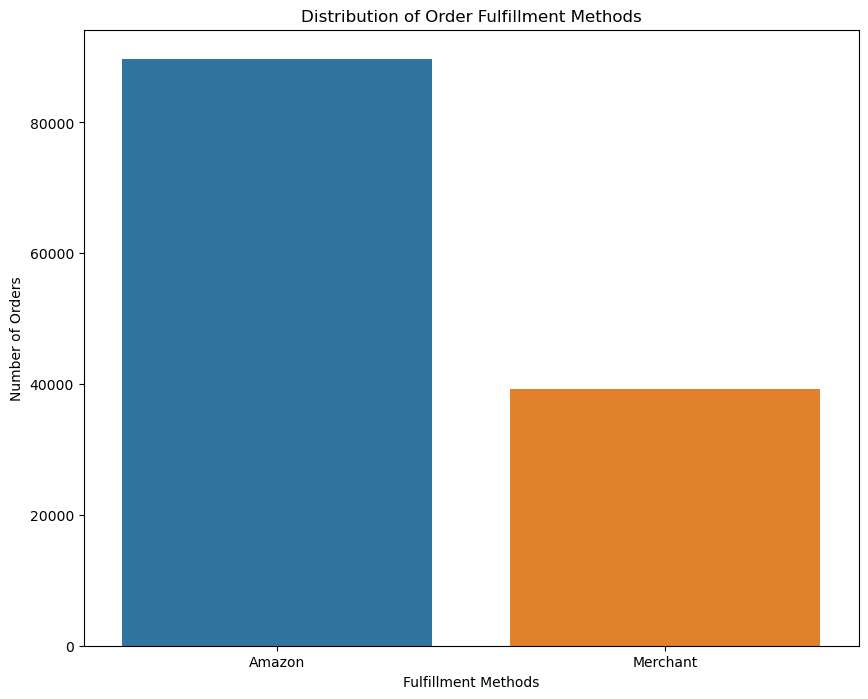

In [25]:
fulfilment_count = data.Fulfilment.value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(x=fulfilment_count.index, y=fulfilment_count.values)
plt.title('Distribution of Order Fulfillment Methods')
plt.xlabel('Fulfillment Methods')
plt.ylabel('Number of Orders')
plt.show()

`Amazon` takes the lead with a `80,000` orders, leaving the `Merchant` trailing behind at `40,000` orders however, the `Merchant's` struggle is evident, managing only half the orders of `Amazon`. This prompts curiosity about customer preferences and product availability. The graph `hints` at a significant gap between the two methods, sparking intrigue about `potential differences in quality, speed, cost, or reliability`.

#### Sales Analysis by Size

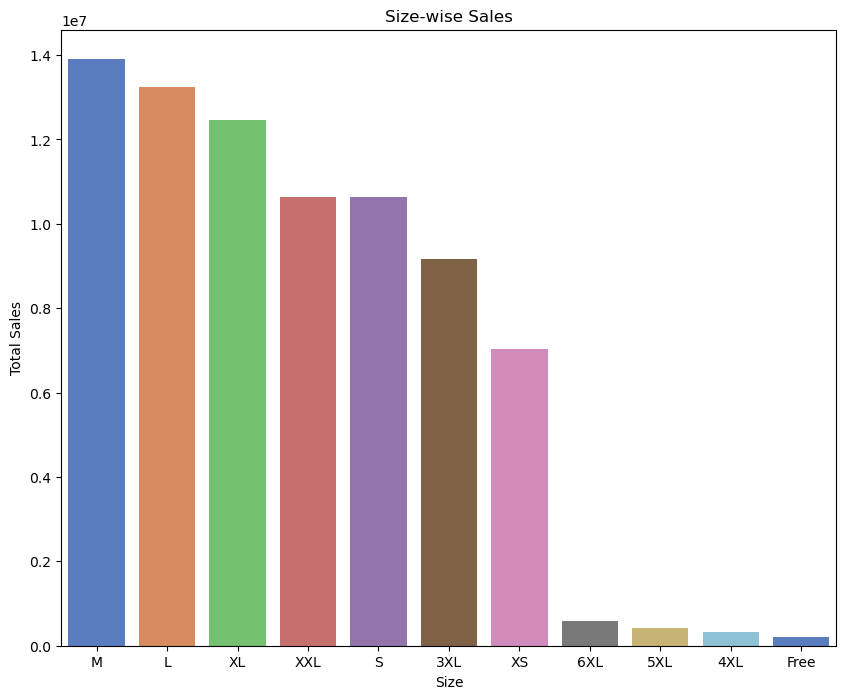

In [26]:
sales_by_size= data.groupby('Size')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=sales_by_size.index, y=sales_by_size.values, palette="muted")

plt.title('Size-wise Sales')
plt.xlabel('Size')
plt.ylabel('Total Sales')
plt.show()

The `M` and `L` sizes have the highest sales, with over `14 million` and `13 million` respectively. This may indicate a high demand or a high availability of these sizes. Overall the graph shows a wide variation in sales by size, ranging from `14 million to less than one thousand`. This could be influenced by factors such as customer preference, product quality etc.

#### Customer Retention Analysis

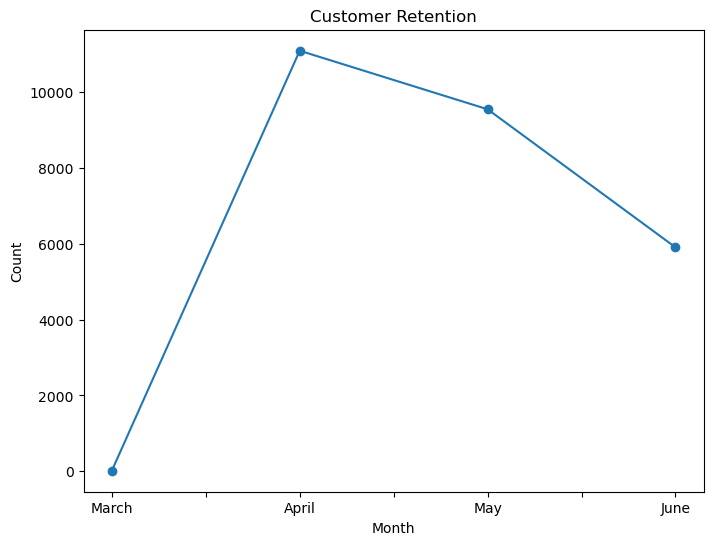

In [27]:
customer_retention = data[data["Status"] == "Shipped - Delivered to Buyer"].groupby("Month")["Order ID"].nunique()
customer_retention = customer_retention.reindex(['March', 'April', 'May', 'June'])

plt.figure(figsize=(8, 6))
customer_retention.plot(x=customer_retention.index, y=customer_retention.values, marker="o")
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Customer Retention")
plt.show()

Customer retention peaks in `April` at almost `10,000` but drops to its lowest, around `6,000`, in `June`. The steady decline over these months suggests a challenge in retaining customers, potentially affecting revenue and growth. Addressing this trend is crucial for sustained business success.

#### SKU Analysis

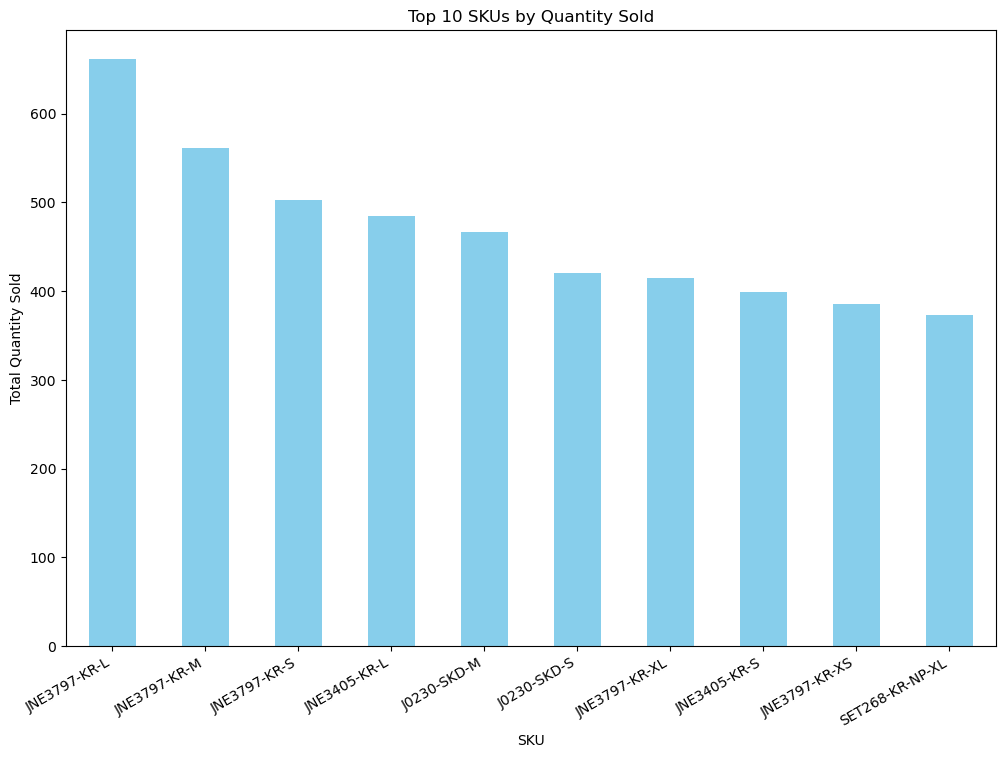

In [28]:
top_sku = data.groupby('SKU')['Qty'].sum().nlargest(10)
plt.figure(figsize=(12, 8))
top_sku.plot(kind='bar', color='skyblue')
plt.xlabel('SKU')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 SKUs by Quantity Sold')
plt.xticks(rotation=30, ha='right')
plt.show()

`NE3197R+RL` leads with almost `600` units sold, signaling popularity or availability. Other SKUs range from `40 to 500` units, indicating varying levels of demand. The graph highlights SKU variations, influenced by factors like quality, preference, pricing, and competition.

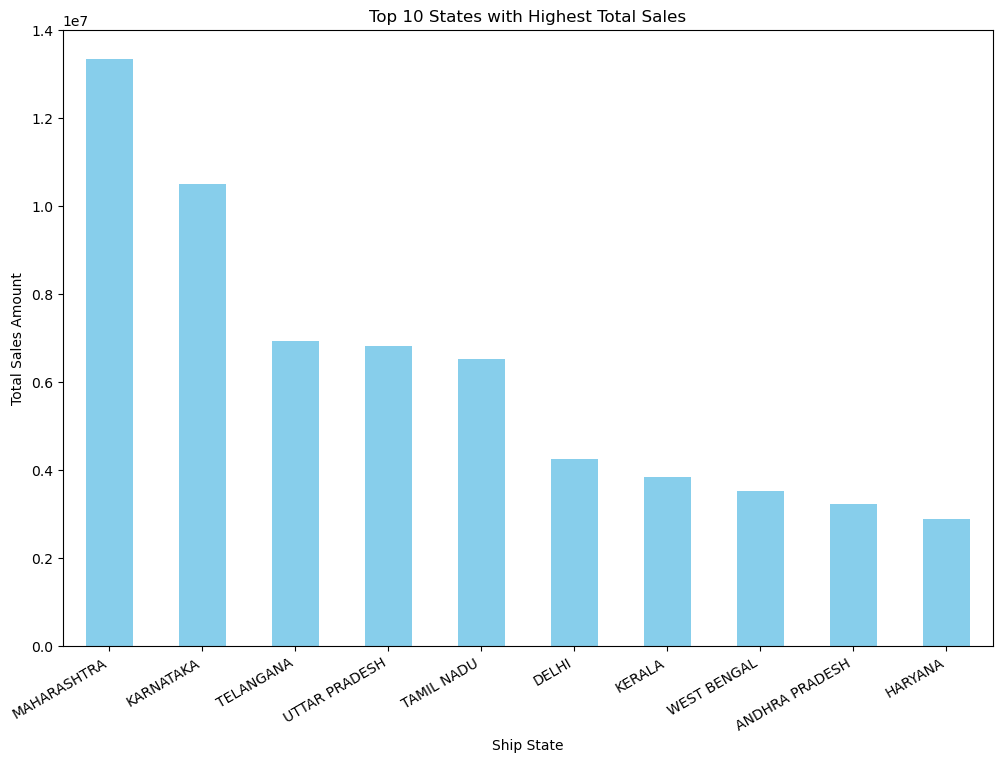

In [29]:
top_states = data.groupby("ship-state")["Amount"].sum().nlargest(10)
plt.figure(figsize=(12, 8))
top_states.plot(kind='bar', color='skyblue')
plt.title('Top 10 States with Highest Total Sales')
plt.xlabel('Ship State')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=30, ha='right')
plt.show()

`Maharashtra` leads in total sales, surpassing `14 million`, indicating high demand or availability. `Karnataka and Telangana` follow with over `12 million` and `11 million`, hinting at strong customer preference or product quality. `Other states` trail with sales ranging from `9 million to 4 million`, suggesting varying market shares or pricing strategies. The graph highlights sales variations influenced by factors like population, income, culture, and competition.

### Key Findings

Sales exhibit a seasonal pattern, hitting a low in March, spiking sharply in April, and gradually declining afterward.

The Set category stands out with sales of about 40 million, nearly doubling the second-highest Kurta category.

In cancelled orders, Set and Kurta categories show the highest numbers, possibly indicating either high demand or a significant return rate.

Amazon leads with 80,000 orders, overshadowing the Merchant at 40,000 orders, revealing a notable gap and raising questions about customer preferences and product availability.

Customer retention peaks in April but drops to 6,000 in June, posing a challenge that needs addressing for sustained business success.